***Importing Libraries***

In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

***Data Loading***

In [2]:
# Laoding pickle file
data=pd.read_pickle('email_campaigns.pkl')

In [ ]:
print(data)

In [4]:
# Aggregrating all the dictionaries
ls=[]
for i in data:
    ls=ls+list(i.values())

In [ ]:
print(ls)

In [6]:
flattened_data = [item for sublist in ls for item in sublist]


In [ ]:
print(flattened_data)

In [8]:
# One element in data whoch is not a dictionary, so remving it
for item in flattened_data:
    if not isinstance(item, dict):
        print(f"Anomaly: {item}")

Anomaly: HR_Consulting_Series


In [ ]:
# Filter out non-dictionary elements from the list
filtered_data = [item for item in flattened_data if isinstance(item, dict)]

# Create a DataFrame from the filtered list of dictionaries
df = pd.DataFrame(filtered_data)

# Display the DataFrame
print(df)

***Data Processing***

In [10]:
df.head()

,subject,body,opened,meeting link clicked,responded,meeting_link_clicked
0,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",False,False,False,NaN
1,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",True,False,False,NaN
2,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",False,False,False,NaN
3,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",True,True,False,NaN
4,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],\n\nIn the digital age, ...",False,False,False,NaN


In [11]:
# Merge columns and fill null values
df['meeting link clicked'] = df['meeting link clicked'].fillna(df['meeting_link_clicked'])

# Drop the original columns if needed
df.drop(columns=['meeting_link_clicked'], inplace=True)

In [12]:
# Check for null vlaues
null_values = df.isnull().sum()
print(null_values)

subject                 0
body                    0
opened                  0
meeting link clicked    0
responded               0
dtype: int64


In [13]:
new_df=df

In [14]:
# Moving opened column to last last place as it acts as label for all the other columns
opened_column = new_df['opened']
new_df = new_df.drop(columns=['opened'])
new_df['opened'] = opened_column

In [15]:
new_df.head()

,subject,body,meeting link clicked,responded,opened
0,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",False,False,False
1,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",False,False,True
2,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",False,False,False
3,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",True,False,True
4,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],\n\nIn the digital age, ...",False,False,False


***Data Cleaning and Pre processing***

In [16]:
# Checking basic information about the dataset
info = new_df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject               154 non-null    object
 1   body                  154 non-null    object
 2   meeting link clicked  154 non-null    object
 3   responded             154 non-null    object
 4   opened                154 non-null    object
dtypes: object(5)
memory usage: 6.1+ KB


In [17]:
# Basic statistics for numerical and categorical columns
describe = new_df.describe(include='all')
describe

,subject,body,meeting link clicked,responded,opened
count,154,154,154,154,154
unique,154,154,2,2,2
top,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",False,False,True
freq,1,1,108,146,114


In [18]:
# Check for null vlaues
null_values = new_df.isnull().sum()
print(null_values)

subject                 0
body                    0
meeting link clicked    0
responded               0
opened                  0
dtype: int64


In [19]:
# Convert 'True' to 1 and 'False' to 0 in the entire DataFrame, ignoring NaN values
new_df['opened'] = new_df['opened'].fillna(False).astype(int)
new_df['responded'] = new_df['responded'].fillna(False).astype(int)
new_df['meeting link clicked'] = new_df['meeting link clicked'].fillna(False).astype(int)


In [20]:
final_df=new_df

***EDA***

In [21]:
# Get the data distributions for 'meeting link clicked'
meeting_link_distribution = final_df['meeting link clicked'].value_counts()

# Get the data distributions for 'responded'
responded_distribution = final_df['responded'].value_counts()

# Get the data distributions for 'opened'
opened_distribution = final_df['opened'].value_counts()

print("Distribution of 'meeting link clicked':")
print(meeting_link_distribution)

print("\nDistribution of 'responded':")
print(responded_distribution)

print("\nDistribution of 'opened':")
print(opened_distribution)


Distribution of 'meeting link clicked':
0    108
1     46
Name: meeting link clicked, dtype: int64

Distribution of 'responded':
0    146
1      8
Name: responded, dtype: int64

Distribution of 'opened':
1    114
0     40
Name: opened, dtype: int64


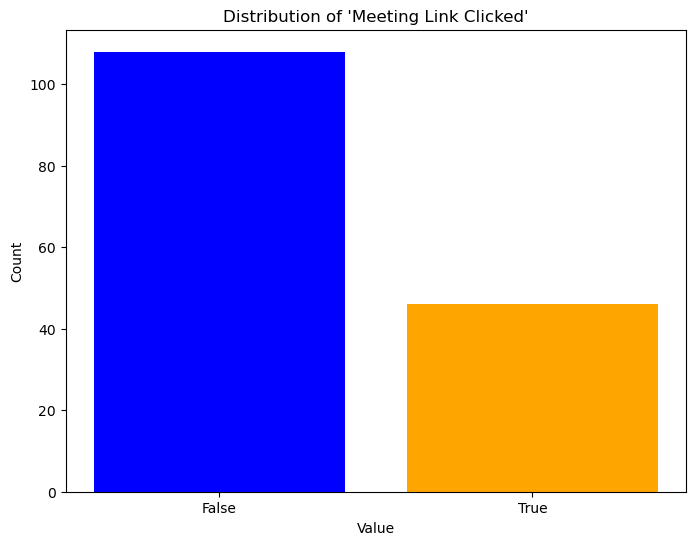

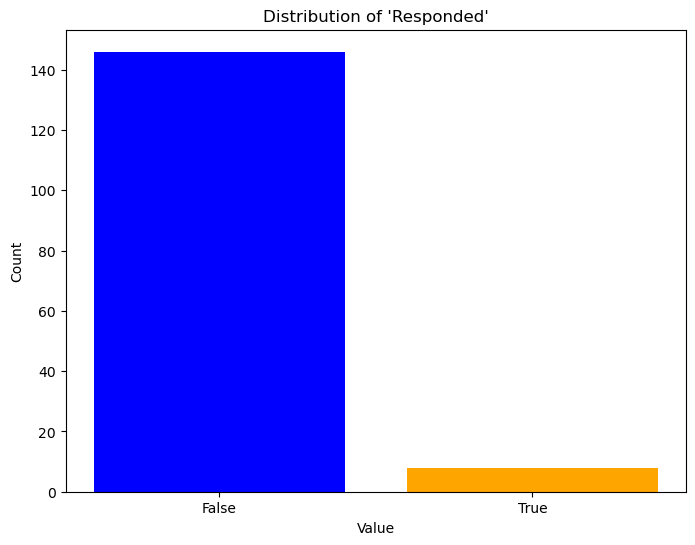

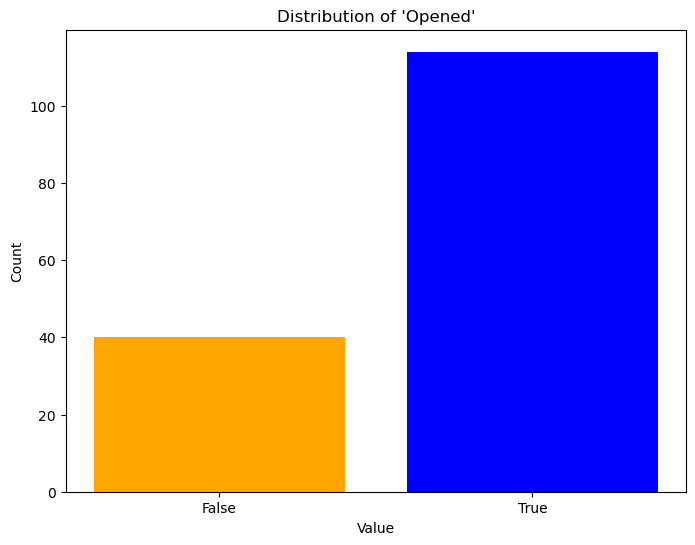

In [41]:

# Get the data distributions for 'meeting link clicked'
meeting_link_distribution = final_df['meeting link clicked'].value_counts()

# Get the data distributions for 'responded'
responded_distribution = final_df['responded'].value_counts()

# Get the data distributions for 'opened'
opened_distribution = final_df['opened'].value_counts()

# Create bar chart for 'meeting link clicked'
plt.figure(figsize=(8, 6))
plt.bar(meeting_link_distribution.index, meeting_link_distribution.values, color=['blue', 'orange'])
plt.title("Distribution of 'Meeting Link Clicked'")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xticks([0, 1], ['False', 'True'])
plt.savefig('a.jpeg')
plt.show()

# Create bar chart for 'responded'
plt.figure(figsize=(8, 6))
plt.bar(responded_distribution.index, responded_distribution.values, color=['blue', 'orange'])
plt.title("Distribution of 'Responded'")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xticks([0, 1], ['False', 'True'])
plt.savefig('b.jpeg')
plt.show()

# Create bar chart for 'opened'
plt.figure(figsize=(8, 6))
plt.bar(opened_distribution.index, opened_distribution.values, color=['blue', 'orange'])
plt.title("Distribution of 'Opened'")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xticks([0, 1], ['False', 'True'])
plt.savefig('c.jpeg')
plt.show()


In [23]:
# Conversion rate from opened to clicked meeting link
opened_count = final_df['opened'].sum()
clicked_count = final_df['meeting link clicked'].sum()
conversion_rate = (clicked_count / opened_count) * 100
print(f"Conversion Rate from Opened to Clicked Meeting Link: {conversion_rate:.2f}%")


Conversion Rate from Opened to Clicked Meeting Link: 40.35%


In [24]:
# Response rate from opened emails
responded_count = final_df['responded'].sum()
response_rate = (responded_count / opened_count) * 100
print(f"Response Rate from Opened Emails: {response_rate:.2f}%")


Response Rate from Opened Emails: 7.02%


In [25]:
# Click-Through Rate (CTR) from sent emails
sent_count = len(final_df)
ctr = (clicked_count / sent_count) * 100
print(f"Click-Through Rate (CTR) from Sent Emails: {ctr:.2f}%")


Click-Through Rate (CTR) from Sent Emails: 29.87%


In [26]:
# Response rate from sent emails
response_rate_sent = (responded_count / sent_count) * 100
print(f"Response Rate from Sent Emails: {response_rate_sent:.2f}%")


Response Rate from Sent Emails: 5.19%


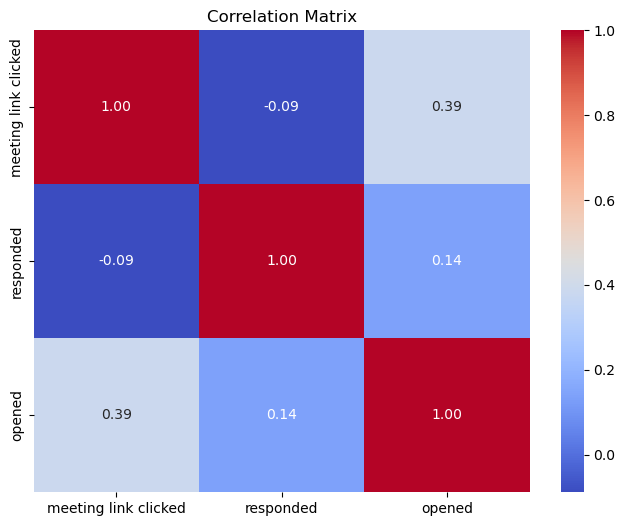

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = final_df[['meeting link clicked', 'responded', 'opened']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import FreqDist
import emoji
import re
from collections import Counter

In [29]:
# Text Cleaning Function
def clean_text(text):
    # Remove special characters and convert to lowercase
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = text.lower()
    return text

# Apply Text Cleaning
final_df['subject'] = final_df['subject'].apply(clean_text)
final_df['body'] = final_df['body'].apply(clean_text)

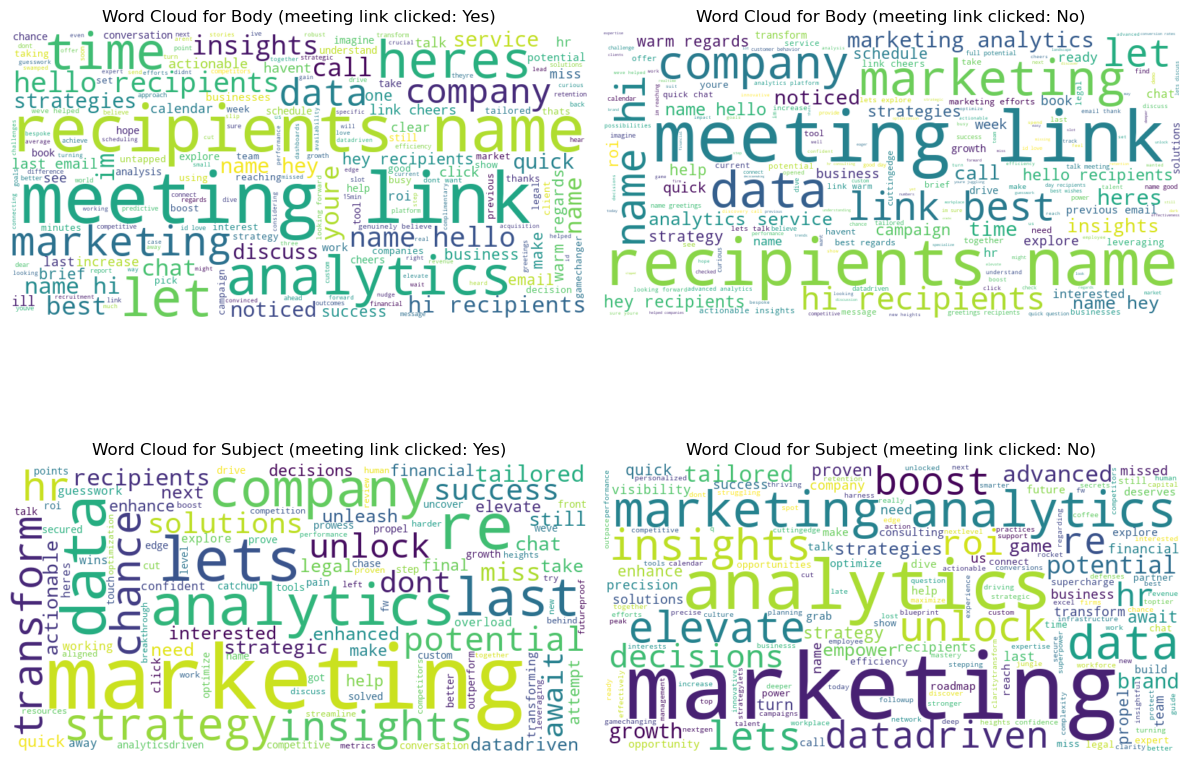

Top 10 Frequent Tokens in Body (Opened: Yes):
[('your', 122), ('name', 95), ('to', 88), ('a', 75), ('you', 59), ('link', 57), ('the', 53), ('recipients', 50), ('meeting', 47), ('our', 39)]

Top 10 Frequent Tokens in Body (Opened: No):
[('your', 336), ('name', 221), ('to', 172), ('a', 155), ('you', 137), ('link', 121), ('the', 113), ('recipients', 109), ('meeting', 109), ('marketing', 99)]

Top 10 Frequent Tokens in Subject (Opened: Yes):
[('your', 25), ('marketing', 20), ('re', 9), ('lets', 8), ('data', 8), ('analytics', 7), ('to', 7), ('for', 6), ('last', 6), ('strategy', 6)]

Top 10 Frequent Tokens in Subject (Opened: No):
[('your', 79), ('marketing', 54), ('with', 45), ('analytics', 36), ('data', 15), ('insights', 15), ('elevate', 15), ('unlock', 14), ('lets', 13), ('boost', 12)]


In [39]:



# Filter data based on "opened" values
opened_yes = final_df[final_df['meeting link clicked'] == 1]
opened_no = final_df[final_df['meeting link clicked'] == 0]



# Create a WordCloud for "body" with "opened" yes
wordcloud_yes_body = WordCloud(width=800, height=400, background_color='white').generate(' '.join(opened_yes['body']))

# Create a WordCloud for "body" with "opened" no
wordcloud_no_body = WordCloud(width=800, height=400, background_color='white').generate(' '.join(opened_no['body']))

# Create a WordCloud for "subject" with "opened" yes
wordcloud_yes_subject = WordCloud(width=800, height=400, background_color='white').generate(' '.join(opened_yes['subject']))

# Create a WordCloud for "subject" with "opened" no
wordcloud_no_subject = WordCloud(width=800, height=400, background_color='white').generate(' '.join(opened_no['subject']))

# Create subplots for the WordClouds
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.imshow(wordcloud_yes_body, interpolation='bilinear')
plt.title('Word Cloud for Body (meeting link clicked: Yes)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(wordcloud_no_body, interpolation='bilinear')
plt.title('Word Cloud for Body (meeting link clicked: No)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(wordcloud_yes_subject, interpolation='bilinear')
plt.title('Word Cloud for Subject (meeting link clicked: Yes)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(wordcloud_no_subject, interpolation='bilinear')
plt.title('Word Cloud for Subject (meeting link clicked: No)')
plt.axis('off')

plt.tight_layout()
plt.savefig('cloud.jpeg')
plt.show()

# Function to get the top N frequent tokens in text
def get_top_tokens(text, n=10):
    words = text.split()
    freq_dist = FreqDist(words)
    return freq_dist.most_common(n)

# Print the top 10 frequent tokens under each WordCloud
print("Top 10 Frequent Tokens in Body (Opened: Yes):")
print(get_top_tokens(' '.join(opened_yes['body'])))
print("\nTop 10 Frequent Tokens in Body (Opened: No):")
print(get_top_tokens(' '.join(opened_no['body'])))
print("\nTop 10 Frequent Tokens in Subject (Opened: Yes):")
print(get_top_tokens(' '.join(opened_yes['subject'])))
print("\nTop 10 Frequent Tokens in Subject (Opened: No):")
print(get_top_tokens(' '.join(opened_no['subject'])))


In [31]:
unique_words = set()

# Iterate through each row in the DataFrame
for index, row in final_df.iterrows():
    # Split the 'subject' and 'body' columns into words
    subject_words = row['subject'].split()
    body_words = row['body'].split()
    
    # Add the words to the set of unique words
    unique_words.update(subject_words)
    unique_words.update(body_words)

# Get the number of unique words
num_unique_words = len(unique_words)

print(f"Number of unique words in 'subject' and 'body' columns: {num_unique_words}")


Number of unique words in 'subject' and 'body' columns: 1219


In [32]:
final_df

,subject,body,meeting link clicked,responded,opened
0,propel your marketing roi with advanced analy...,hey recipients name\n\nready to see your marke...,0,0,0
1,data is your superpower unlock insights with us,hi recipients name\n\nim reaching out again be...,0,0,1
2,turn marketing data into decisions lets explo...,greetings recipients name\n\nwe havent connect...,0,0,0
3,marketing success is a click away lets chat a...,hello recipients name\n\nits clear that youre ...,1,0,1
4,boost your brands visibility with proven mark...,hi recipients name\n\nin the digital age data ...,0,0,0
...,...,...,...,...,...
149,streamline hr and boost performance,hello recipients name\n\nefficiency is king e...,1,0,1
150,boost your brand visibility,hello recipients name\n\nwant to skyrocket you...,0,0,1
151,outpace competitors with insightful analytics,hi recipients name\n\ni noticed youre navigati...,0,0,1
152,tailored analytics for you,hey recipients name\n\nyour brand deserves to ...,0,0,0


In [37]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df = final_df

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Separate the 'body' into 'meeting link clicked 1' and 'meeting link clicked 0'
df['meeting link clicked 1'] = df.apply(lambda row: row['body'] if row['meeting link clicked'] == 1 else '', axis=1)
df['meeting link clicked 0'] = df.apply(lambda row: row['body'] if row['meeting link clicked'] == 0 else '', axis=1)

# Calculate sentiment scores for 'meeting link clicked 1' block
df['sentiment_meeting_link_clicked_1'] = df['meeting link clicked 1'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

# Calculate sentiment scores for 'meeting link clicked 0' block
df['sentiment_meeting_link_clicked_0'] = df['meeting link clicked 0'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

# Calculate the average sentiment scores for both blocks
average_sentiment_meeting_link_clicked_1 = df['sentiment_meeting_link_clicked_1'].mean()
average_sentiment_meeting_link_clicked_0 = df['sentiment_meeting_link_clicked_0'].mean()

# Display the average sentiment scores for each block
print("Average Sentiment Score for 'meeting link clicked 1' block:", average_sentiment_meeting_link_clicked_1)
print("Average Sentiment Score for 'meeting link clicked 0' block:", average_sentiment_meeting_link_clicked_0)


Average Sentiment Score for 'meeting link clicked 1' block: 0.23077662337662333
Average Sentiment Score for 'meeting link clicked 0' block: 0.6018889610389611


***Model Development***

In [46]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

df = final_df  # Ensure final_df is defined and contains the dataset

# Separate features and target
X = df[['subject', 'body', 'meeting link clicked', 'responded']]
y = df['opened']

def extract_numeric_features(X):
    return X.iloc[:, -2:]

# Vectorizing text data
text_features = ColumnTransformer([
    ('tfidf_sub', TfidfVectorizer(), 'subject'),
    ('tfidf_body', TfidfVectorizer(), 'body')
], remainder='drop')

# Combining all features
all_features = FeatureUnion([
    ('text', text_features),
    ('numeric', FunctionTransformer(extract_numeric_features))
])

# List of models to try
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    DecisionTreeClassifier()
]

# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    pipeline = Pipeline(steps=[
        ('features', all_features),
        ('to_dense', FunctionTransformer(lambda x: np.asarray(x.todense()), accept_sparse=True)), 
        ('pca', PCA(n_components=2)),  
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluating each model
for model in models:
    train_evaluate_model(model, X_train, X_test, y_train, y_test)


Model: LogisticRegression
Accuracy: 0.8709677419354839
Precision: 0.8709677419354839
Recall: 1.0
F1 Score: 0.9310344827586207

Model: RandomForestClassifier
Accuracy: 0.6451612903225806
Precision: 0.8636363636363636
Recall: 0.7037037037037037
F1 Score: 0.7755102040816326

Model: GradientBoostingClassifier
Accuracy: 0.7419354838709677
Precision: 0.9130434782608695
Recall: 0.7777777777777778
F1 Score: 0.84

Model: SVC
Accuracy: 0.8709677419354839
Precision: 0.8709677419354839
Recall: 1.0
F1 Score: 0.9310344827586207

Model: DecisionTreeClassifier
Accuracy: 0.6774193548387096
Precision: 0.9047619047619048
Recall: 0.7037037037037037
F1 Score: 0.7916666666666667



In [55]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

# Load your dataset
df = final_df

# Sentiment Analysis setup
analyzer = SentimentIntensityAnalyzer()

def sentiment_scores(text):
    return analyzer.polarity_scores(text)['compound']

df['subject_sentiment'] = df['subject'].apply(sentiment_scores)
df['body_sentiment'] = df['body'].apply(sentiment_scores)

X = df[['subject', 'body', 'subject_sentiment', 'body_sentiment', 'meeting link clicked', 'responded']]
y = df['opened']

preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf_sub', TfidfVectorizer(), 'subject'),
        ('tfidf_body', TfidfVectorizer(), 'body')
    ], remainder='passthrough')

# List of classifiers to try
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    DecisionTreeClassifier()
]

# Function to train and evaluate a model
def train_evaluate_model(classifier, X_train, X_test, y_train, y_test):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    print(f"Model: {classifier.__class__.__name__}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluating each classifier
for classifier in classifiers:
    train_evaluate_model(classifier, X_train, X_test, y_train, y_test)


Model: LogisticRegression
Accuracy: 0.8064516129032258
Precision: 0.8620689655172413
Recall: 0.9259259259259259
F1 Score: 0.8928571428571429

Model: RandomForestClassifier
Accuracy: 0.8709677419354839
Precision: 0.8709677419354839
Recall: 1.0
F1 Score: 0.9310344827586207

Model: GradientBoostingClassifier
Accuracy: 0.7741935483870968
Precision: 0.9166666666666666
Recall: 0.8148148148148148
F1 Score: 0.8627450980392156

Model: SVC
Accuracy: 0.8709677419354839
Precision: 0.8709677419354839
Recall: 1.0
F1 Score: 0.9310344827586207

Model: DecisionTreeClassifier
Accuracy: 0.8064516129032258
Precision: 1.0
Recall: 0.7777777777777778
F1 Score: 0.8750000000000001

